In [12]:
import random 
import string

def generate_random_string(length):
    return ''.join(random.choices(string.ascii_lowercase, k=length))

def generate_random_palindrome(length):
    ret = ""
    half_ret = generate_random_string(length//2)
    if(length % 2 == 1):
        ret = half_ret + "a" + (half_ret[::-1])
    else:
        ret = half_ret + (half_ret[::-1])
    return ret

def generate_n_seperated_palindromes(n):
    length = (n - 20) //10
    ret = ""
    for _ in range(10):
        sub_palindrome = generate_random_palindrome(length)
        ret += sub_palindrome
        ret += "qk" # seperator
    return ret

def generate_test_case(n, choice):
    t = 100
    strings = []
    for _ in range (t):
        if(choice == 0):
            strings.append(generate_random_string(n))
        elif (choice == 1):
            strings.append(generate_random_palindrome(n))
        else:
            strings.append(generate_n_seperated_palindromes(n))
    return t, strings

In [ ]:
import subprocess
import time

command = "cd cpp && make build && cd .."
result = subprocess.run(command, shell=True, capture_output=True)
command = "stack install"
result = subprocess.run(command, shell=True, capture_output=True)
time_difs_c = []
time_difs_hs = []
xs = []
command_c = "cpp/build/msubstr"
command_hs = "msubstr"
t = 0
for i in range(1, 15):
    length_of_string = (i+1) * 500
    xs.append(length_of_string)
    time_difs_c.append([])
    time_difs_hs.append([])
    for k in range(3):
        new_t, new_string = generate_test_case(length_of_string, k)
        generated_input = f"{new_t}\n" + "\n".join(new_string)
        t = new_t
        print(i)
        time_difs_c[i-1].append([])
        time_difs_hs[i-1].append([])
        for j in range (15):
            starting_time = time.time_ns()
            result = subprocess.run(command_c, shell=True, input=generated_input, text=True, capture_output=True)
            end_time = time.time_ns()
            time_dif = end_time - starting_time
            time_dif_ns = time_dif
            time_difs_c[i-1][k].append(time_dif_ns)
            
        time_difs_hs.append([])
        for j in range (15):
            starting_time = time.time_ns()
            result = subprocess.run(command_hs, shell=True, input=generated_input, text=True, capture_output=True)
            end_time = time.time_ns()
            time_dif = end_time - starting_time
            time_dif_ns = time_dif
            time_difs_hs[i-1][k].append(time_dif_ns)

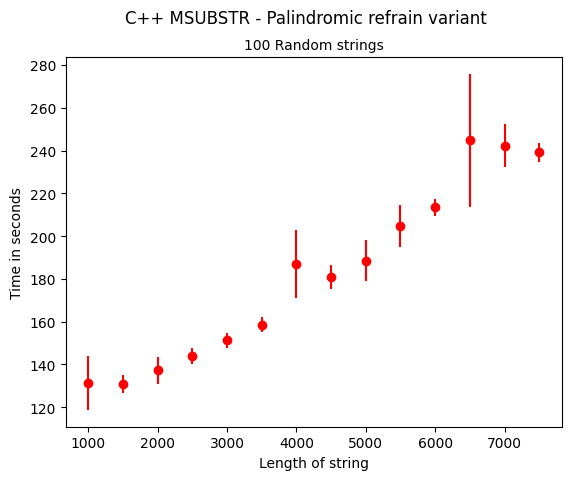

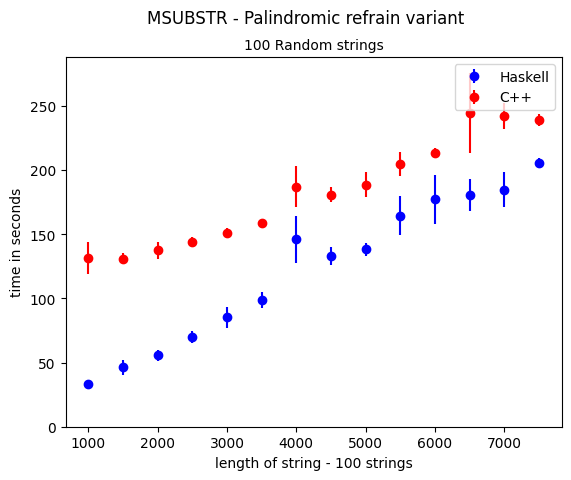

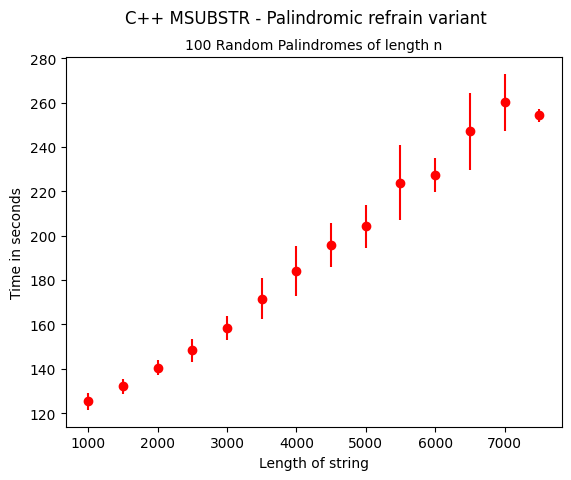

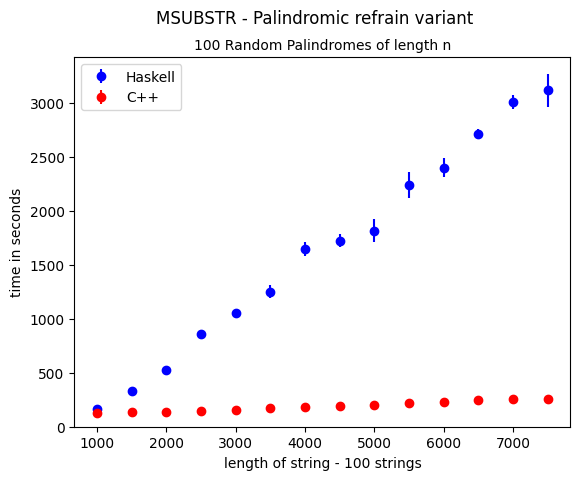

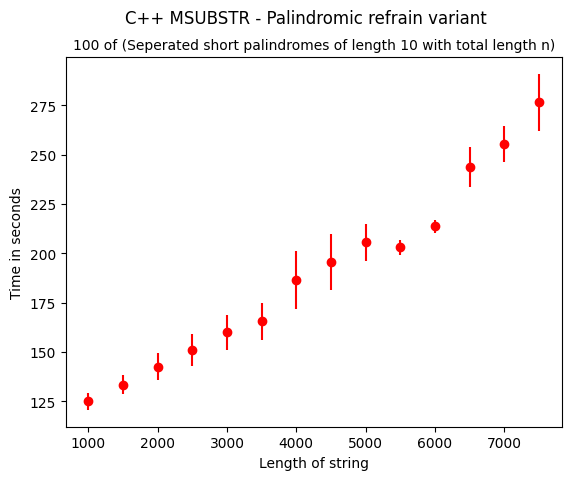

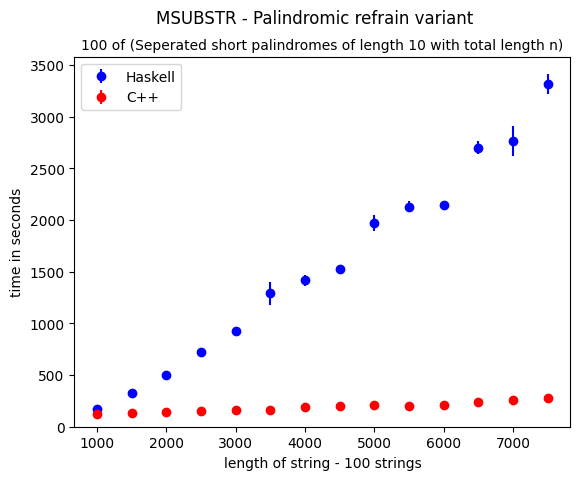

In [20]:
import numpy as np
import matplotlib.pyplot as plt

titles = ["100 Random strings", "100 Random Palindromes of length n", "100 of (Seperated short palindromes of length 10 with total length n)"]
for j in range(3):
    mean_c, std_c = [], []
    mean_hs, std_hs = [], []
    for i in range (14):
        mean_c.append(np.mean(time_difs_c[i][j])/1e6)
        std_c.append(np.std(time_difs_c[i][j])/1e6)
        mean_hs.append(np.mean(time_difs_hs[i][j])/1e6)
        std_hs.append(np.std(time_difs_hs[i][j])/1e6)

    plt.errorbar(xs, mean_c, yerr=std_c, fmt="o", color="r")
    plt.ylabel("Time in seconds")
    plt.xlabel("Length of string")
    plt.suptitle("C++ MSUBSTR - Palindromic refrain variant")
    plt.title(titles[j], fontsize=10)
    plt.show()

    # plt.errorbar(xs, mean_hs, yerr=std_hs, fmt="o", color="b")
    # plt.title("Haskell MSUBSTR - Palindromic refrain variant")
    # plt.ylabel("time in seconds")
    # plt.xlabel("length of string")
    # plt.ylim(0)
    # plt.show()
    plt.errorbar(xs, mean_hs, yerr=std_hs, fmt="o", color="b", label="Haskell")
    plt.errorbar(xs, mean_c, yerr=std_c, fmt="o", color="r", label="C++")
    plt.suptitle("MSUBSTR - Palindromic refrain variant")
    plt.title(titles[j], fontsize=10)
    plt.ylabel("time in seconds")
    plt.xlabel(f"length of string - {t} strings")
    plt.ylim(0)
    plt.legend()
    plt.show()


In [ ]:
import subprocess
import time

command = "cd cpp && make build && cd .."
result = subprocess.run(command, shell=True, capture_output=True)
command = "stack install"
result = subprocess.run(command, shell=True, capture_output=True)
xs = [500, 1000, 1500, 2000, 2500, 3000, 4000, 5000, 6000]
time_difs_c = []
time_difs_hs = []
command_c = "cpp/build/queries"
command_hs = "queries"
for i in range(1, 10):
    time_difs_c.append([])
    time_difs_hs.append([])
    for j in range (1, 5): 
        input_file = f"tests/queries-tests/{xs[i-1]}_{j}"
        input_content = ""
        time_difs_c[i-1].append([])
        time_difs_hs[i-1].append([])
        with open(input_file, 'r') as file:
            t = file.readline()
            input_content = file.read()
            input_content = t + input_content
            print(int(t), xs[i-1])
            assert(int(t) == xs[i-1])
            for _ in range (10):
                starting_time = time.time_ns()
                result = subprocess.run(command_c, shell=True, text=True, capture_output=True, input=input_content)
                end_time = time.time_ns()
                time_dif = end_time - starting_time
                time_dif_ns = time_dif
                time_difs_c[i-1][j-1].append(time_dif_ns)
            for _ in range (10):
                starting_time = time.time_ns()
                result = subprocess.run(command_hs, shell=True, text=True, capture_output=True, input=input_content)
                end_time = time.time_ns()
                time_dif = end_time - starting_time
                time_dif_ns = time_dif
                time_difs_hs[i-1][j-1].append(time_dif_ns)

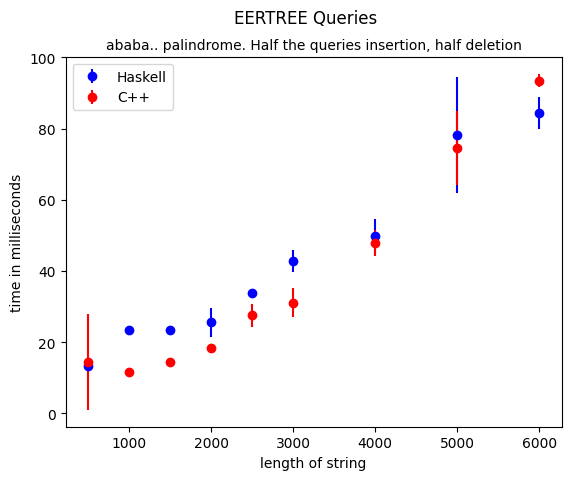

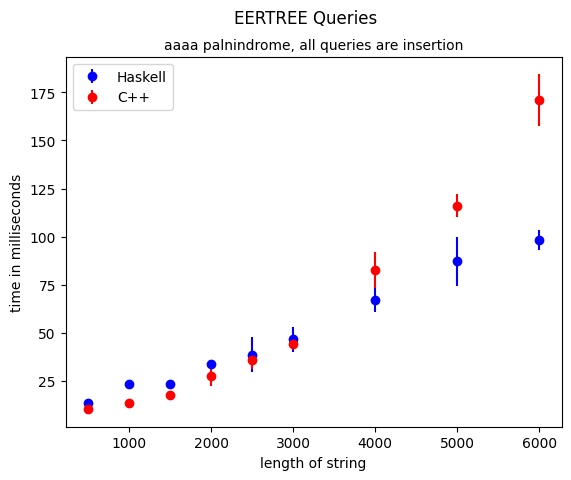

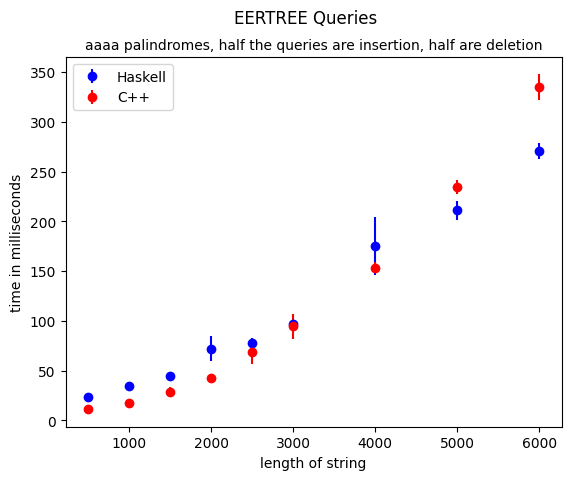

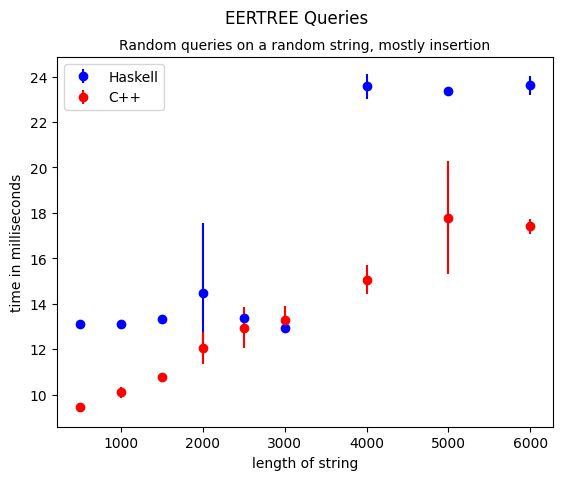

In [5]:
import numpy as np
import matplotlib.pyplot as plt

titles = ["ababa.. palindrome. Half the queries insertion, half deletion"]
titles.append("aaaa palnindrome, all queries are insertion")
titles.append("aaaa palindromes, half the queries are insertion, half are deletion")
titles.append("Random queries on a random string, mostly insertion")
for j in range (4):
    mean_c, std_c = [], []
    mean_hs, std_hs = [], []
    for i in range (9):
        mean_c.append(np.mean(time_difs_c[i][j])/1e6)
        std_c.append(np.std(time_difs_c[i][j])/1e6)
        mean_hs.append(np.mean(time_difs_hs[i][j])/1e6)
        std_hs.append(np.std(time_difs_hs[i][j])/1e6)
    plt.errorbar(xs, mean_hs, yerr=std_hs, fmt="o", color="b", label="Haskell")
    plt.errorbar(xs, mean_c, yerr=std_c, fmt="o", color="r", label="C++")
    plt.suptitle("EERTREE Queries")
    plt.title(titles[j], fontsize=10)
    plt.ylabel("time in milliseconds")
    plt.xlabel("length of string")
    plt.legend()
    plt.show()
